In [ ]:
# 앙상블
# 배깅, 부스팅
# 성능이 잘나온다

In [ ]:
# Ensemble - Bagging
# RandomForest > 랜덤성을 사용해서 Decision Tree를 여러개 사용한다
# 서로 다른 Decision Tree를 여러개 만들어서 합친다

## 1. 문제정의
- 유방암 데이터셋을 사용해서 암을 분류해보자

## 2. 데이터 수집

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## 3. 데이터 전처리

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
cancer['filename']

'breast_cancer.csv'

In [9]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [13]:
# 데이터 분리
# 문제(X - iris['data'])와 정답(y - iris['target'])
X = cancer['data']
y = cancer['target']
# 훈련(train - 7)과 평가(test - 3) + 데이터 섞어주기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 6)

In [14]:
# 데이터 분리 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
knn = KNeighborsClassifier(n_neighbors = 6, p = 1, weights = 'distance')
dt = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14)

In [26]:
knn.fit(X_train,y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=14)

In [27]:
print(knn.score(X_train,y_train))

1.0


In [29]:
print(knn.score(X_test,y_test))

0.9532163742690059


In [32]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))
X_train[0]

0.992462311557789
0.9473684210526315


array([1.846e+01, 1.852e+01, 1.211e+02, 1.075e+03, 9.874e-02, 1.053e-01,
       1.335e-01, 8.795e-02, 2.132e-01, 6.022e-02, 6.997e-01, 1.475e+00,
       4.782e+00, 8.060e+01, 6.471e-03, 1.649e-02, 2.806e-02, 1.420e-02,
       2.370e-02, 3.755e-03, 2.293e+01, 2.768e+01, 1.522e+02, 1.603e+03,
       1.398e-01, 2.089e-01, 3.157e-01, 1.642e-01, 3.695e-01, 8.579e-02])

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train, y_train, cv=5).mean()

0.9170253164556961

In [34]:
cross_val_score(dt, X_train, y_train, cv=5).mean()

0.9398101265822785

In [21]:
train_list

[1.0,
 0.964824120603015,
 0.9522613065326633,
 0.9522613065326633,
 0.9346733668341709,
 0.9371859296482412,
 0.9296482412060302,
 0.9271356783919598,
 0.9271356783919598,
 0.9296482412060302,
 0.9321608040201005,
 0.9321608040201005,
 0.9296482412060302,
 0.9296482412060302,
 0.9296482412060302,
 0.9296482412060302,
 0.9246231155778895,
 0.9296482412060302,
 0.9271356783919598,
 0.9296482412060302]

## 4. 탐색적 데이터 분석

## 5. 모델 선택 및 하이퍼 파라미터 튜닝
 1. X_train, X_test, y_train, y_test 만들기
 2. KNN, Decision Tree 모델 불러오기
 3. 하이퍼 파라미터 튜닝 해보기

In [43]:
# Ensemble - RandomForest
# 랜덤성을 사용해서 DecisionTree 여러개 사용하기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150, max_features=0.5 )

In [45]:
rf.fit(X_train, y_train)
rf.fit(X_test, y_test)

RandomForestClassifier(max_features=0.5, n_estimators=150)

In [46]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.957286432160804
1.0


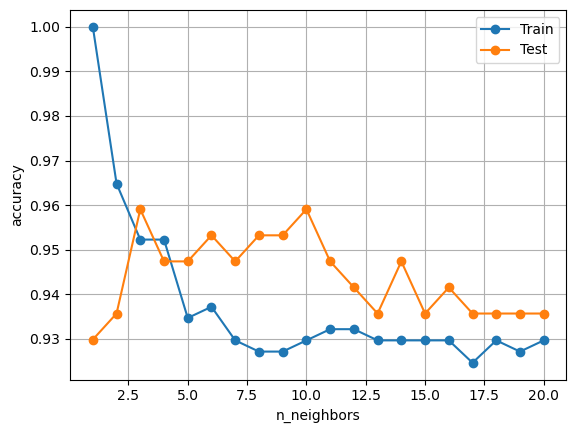

In [22]:
import matplotlib.pyplot as plt
plt.plot(n_n_settings, train_list, label = 'Train', marker = 'o') # 꺽은선 그래프
plt.plot(n_n_settings, test_list, label = 'Test', marker = 'o')
plt.legend() # 각 그래프의 label표시하기
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.grid() # 격자무늬 표시
plt.show()

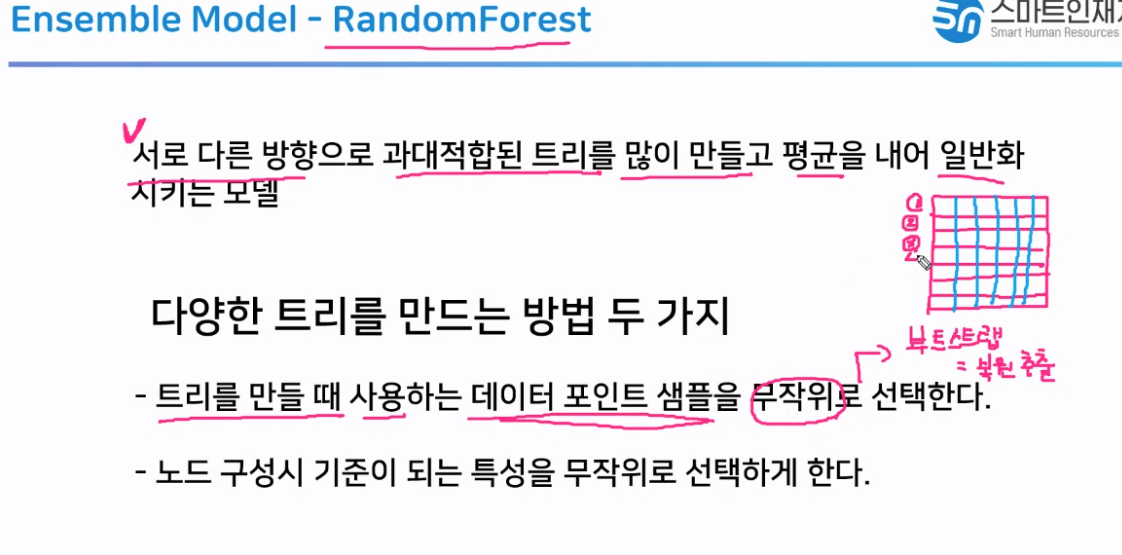

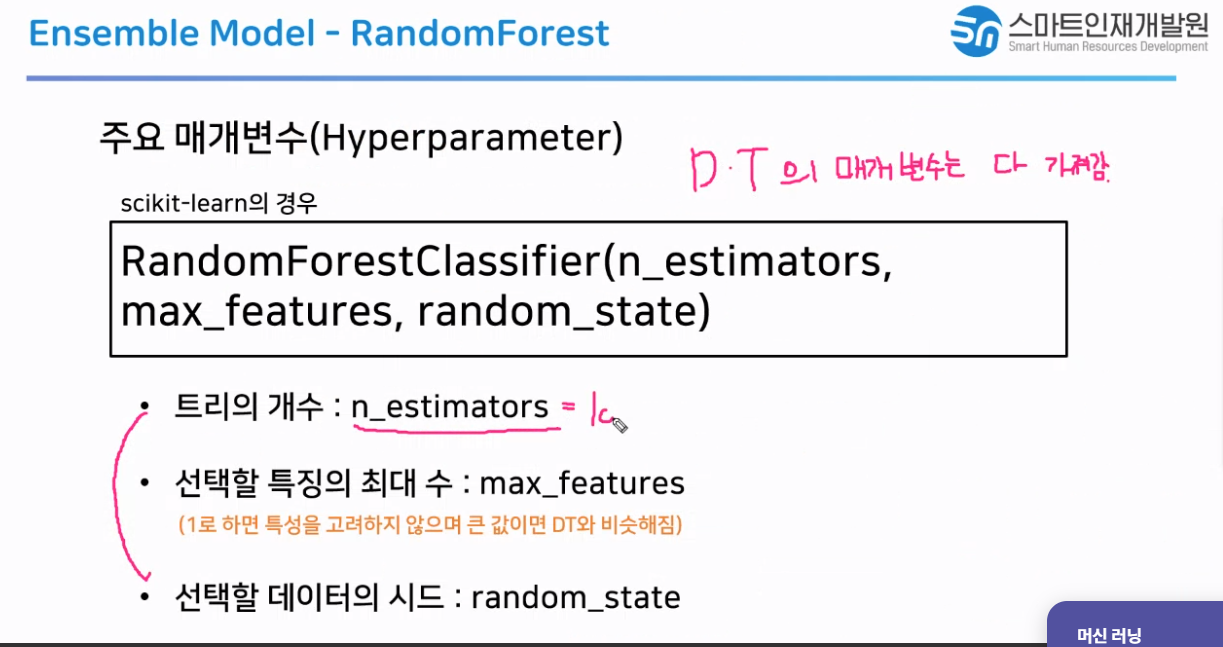

In [ ]:
# 여러개의 하이퍼 파라미터 튜닝하려면 하나씩 해봐야함
# GridSearch
# 사용 가능한 매개변수의 모든 조합을 시도해보는 것
# RandomForest
# max_features = [0.4, 0.5, 0.6, 0.7]
# n_estimators = [50, 100,150, 200]
# max_depth = [4,5,6,7,8]
# max_leaf_node = [300,400,500,600]

In [48]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid_param = {'max_features' : [0.4, 0.5, 0.6,0.7],
             'n_estimators' : [50,100,150,200],
             'max_depth' : [4,5,6,7,8],
             'max_leaf_nodes' : [300,400,500,600]}

In [53]:
grid_search = GridSearchCV(RandomForestClassifier(), grid_param , cv = 5 )

In [54]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [0.4, 0.5, 0.6, 0.7],
                         'max_leaf_nodes': [300, 400, 500, 600],
                         'n_estimators': [50, 100, 150, 200]})

In [57]:
# Ensemble - AdaBoost
# DecisionTree 여러개를 연결해서 사용하기
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [58]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [60]:
print(ada.score(X_train, y_train))
print(ada.score(X_test, y_test))

1.0
0.9590643274853801


In [61]:
cross_val_score(ada, X_train, y_train, cv=5).mean()

0.9649050632911391

In [62]:
# 특성의 중요도 확인 가능 
# 전체 특성 중요도의 합 : 1
# 들어가는 시간(예측 시간) :  데이터의 양 줄이기 > 중요도가 낮은 데이터부터 삭제
rf.feature_importances_

array([0.00152304, 0.00943399, 0.00624235, 0.00286006, 0.00731496,
       0.0021669 , 0.04853478, 0.08116076, 0.00669979, 0.00389499,
       0.00452651, 0.00212549, 0.00346849, 0.02198199, 0.00780342,
       0.00184458, 0.00181449, 0.0014457 , 0.00123128, 0.00426585,
       0.12997595, 0.01711493, 0.28668389, 0.19352994, 0.00940685,
       0.00961108, 0.05634795, 0.06311328, 0.01138863, 0.00248806])

In [63]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

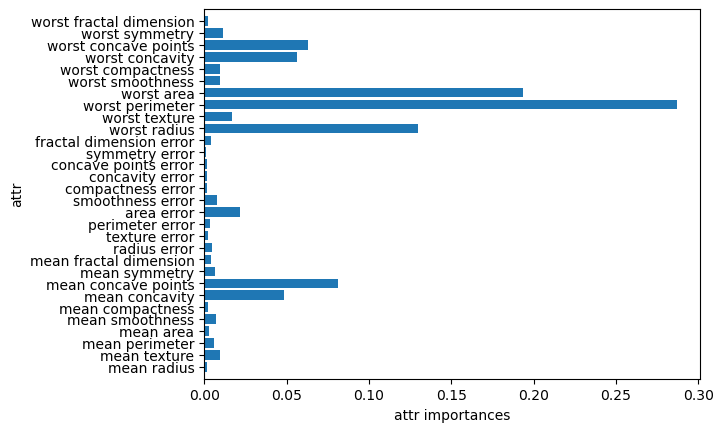

In [64]:
import matplotlib.pyplot as plt
import numpy as np 
# 축 번호별로 중요도 그래프를 그림
plt.barh(range(30), rf.feature_importances_)
# 축 번호에 축 이름을 출력
plt.yticks(np.arange(30), cancer.feature_names)
plt.xlabel("attr importances")
plt.ylabel("attr")
plt.ylim(-1, 30)
plt.show()

## 6. 학습
- KNN, Decision Tree 모델에 학습하기

## 7. 평가
 - 기본 평가, 교차 검증 사용해보기

In [ ]:
# Ensemble - Boosting
# AdaBoosting > Decision Tree를 여러개 사용한다
# 하나의 Decision Tree를 여러번 발전시킨다

In [55]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.7, max_leaf_nodes=600,
                       n_estimators=50)

In [56]:
grid_search.best_score_

0.9648417721518987